In [17]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from euler_manual import eulerex
from rk4_manual import RK4
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)


# Interpretación del Paper

## Modelamiento matemático

Como primer paso necesitamos hallar las frecuencias naturales a las cuales el líquido oscila. Esto depende de la geometria de la vasija  y de las propiedades del líquido. La ecuación $W_{mn}^2$ presentada en el texto nos da la herramienta para para calcular frecuencias en diferentes oscilaciones. En nuestro caso, supondremos que la vasija es cilíndrica.
Tenemos entonces la ecuación;


$$W_{mn}^2 = \frac{gE_{mn}}{R} tangh \left(E_{mn} \frac{H}{R}\right)\left[1+\frac{\sigma}{\rho g}\left(\frac{E_{mn}}{R} \right)^2\right]$$


Notemos que la densdad  está en el denominador, esto tiene mucho sentido pues, a mayor densidad (que es la que nos dice la dificultad al movernos) la oscilación es más pequeña. Igualmente pasa con la gravedad, a amyor gravedad se nos dificulta más mover las cosas, pues es una fuerza que ofrece resistencia al movimiento. Nótese además que entre mayor sea el radio, hay mayor cantidad de líquido en la superficie. Por lo tanto, cualquier energía que se le aplique se va a distrubuir en una mayor superficie, luego se necesita mayor energía. 
desglozando cads  parte de la ecuación, para entender que significa cada variable tenemos


$W_{mn}$ es la fecuencia natural del modo de  oscilación del líquido, es decir, la vibración del café en la taza.


$E_{mn}$ es el número de ondas asociada a la superficie del líquido que depende de la geometria de la taza 


$R$  radio de la taza


$H$ altura del café en la taza



En virtud de lo anterior, la ecuación nos dice básicamente la  variación de la oscilación dependiendo de la geometría de la taza, la cantidad de café y propiedades como la temnsión superficial. Los parametrpos de esta ecuación de esta ecuacion son R y H los cuales determinan la forma y profundidad del líquido, afectando la dinámica de oscilación.




Analicemos ahora la segunda ecuación. Como nuestro problema sobre el café es equivalente a un problema sobre un péndulo ya que con este último es más sencillo de trabajar tiene sentido analizar $L=T-V$
Nótese que esta ecuación es la diferencia entre la energía cinética $T$ y la emergía potencial $V$. 
Pensémoslo por partes, primero la energía cinética. De física sabemos que la energía cinética es 

$$T= \frac{mV^2}{2}$$
Nos queda averiguar porque en nuestra ecuación $V^2= (\dot{x}-\dot{x}_0)^2+ (\dot{z}+\dot{z}_0)^2$
Esto se deduce fácilemte del  teorema de pitágoras, (sabemos que son velocidades por el puntico que tiene arriba las variables, dado que son las derivadas respecto al tiempo  y la derivada de la posición respecto al tiempo es velocidad) donde los catetos son la velocidad horizontal $(\dot{x}-\dot{x}_0)$   y  velocidad vertical  $(\dot{z}+\dot{z}_0)$ y por tanto la hipotenusa es la suma de estas velocidades que se suman como se suman vectores.  Notese que como  estamos trabajando con $V^2$ entonces por eso se elimina la raiz. Con esto entonces entendemos porque $V^2= (\dot{x}-\dot{x}_0)^2+ (\dot{z}+\dot{z}_0)^2$

<p align="center">
<img src="./triangulito.jpeg" alt="Description" width="300" height="200" >
</p>




Analicemos ahora la energía potencial $T$. Sabemos de física que la fórmula de la energía potencial es 
$ E_p=m.g.h$ En nuestra ecuación tenemos m.g.[z+z_0]. Una pregunta natural es, ¿porqué $z+z_0=h$?
Desglozando estos párametros nos damos cuenta que z es la posición del péndulo y $z_0$ es la velocidad del péndulo.  Por ello, para hallar la altura nos fijamos en el movimiento del péndulo. Como no solamente se mueve el péndulo sino que además se mueve el pivote y la altúra est´qa contando estos dos movimientos, entonces tiene sentido que $z+z_0=h$ 











Analicemos ahora la ecuación $(2)$
Nótese que eb $(1)$ estábamos en coordenadas cartesianas y en $(2)$ pasamos a coordenadas polares, haciendo claramente otras transformaciones. Bien, Esta ecuación nos proporciona un análisis de las aceleraciones puesto que si suponemos por un momento que $r\neq 0. Entonces sacando inicialmente factor común r y dado que $r\neq 0 puediendo pasarlo a dividir al otro lado del igualdad obtenemos 

$$r(r\ddot{\theta}[g+\ddot{z_0}]sen\theta+\ddot{x_0}cos\theta+2\dot{r}\dot{\theta})=0$$  

$$(r\ddot{\theta}[g+\ddot{z_0}]sen\theta+\ddot{x_0}cos\theta+2\dot{r}\dot{\theta})=0$$

entonces analizando ahora si cada una de las partes de la ecuación nos damos cuenta que $r\ddot{\theta}$ es aceleración $[g+\ddot{z_0}]sen\theta$  es la suma de las aceleraciones en la componenete vertical, $\ddot{x_0}cos\theta$  es aceleración en la componente vertical y $\dot{r}\dot{\theta}$ es la aceleración que considera el cambio de la longitud del péndulo. 





Analicemos ahora la ecuación $(4)$. 
$$u'' + [1 + \varepsilon \lambda \Omega^2 \cos (\Omega \tau)]
\left( u - \frac{\varepsilon^2 u^3}{6} \right) = 0$$


Esta ecuación describe la dinámica de un péndulo debido al movimiento vertical del pivote, despreciando el movimiento horizontal. 
Notemos que $u^{''}$ es la aceleración y  $u$ es la posición angular, la cuál es el ánguloque forma el péndulo cuando está quieto y el péndulo cuando se mueve. Esta ecuación modela como como la oscilación de la base (debido al caminar de la persona) puede amplificar o estabilizar el movimiento del café dentro de la taza, dependiendo de la frecuencia y amplitud de la excitación. Vamos ahora a explicar algunos de los parámetros de esta ecuación que nos permitirá entenderla mejor, ( los que logro entender)
Tenemos como parámetro a $\epsilon$  el cuál es el parámetro de perturbación, es decir, tiene que ver con el grado de no linealidad del sistema, cuanto más grande sea  $\epsilon$ más fuerte aon los efectos no lineales del líquido. Es por ello que nos importa tomar $\epsilon$ suficientemente pequeños para que el comportamiento de la ecuación sea estable. Por otro lado  $\lambda$ mide la variación del sistema debido a la excitación vertical de la taza. También es importante decir que depende de la relación entre $∆z$ y $r_0$ Además, de la misma forma que  $\epsilon$ lo vamos a tomar suficientemente pequeño, por las mismas razones.  $\frac{\varepsilon^2 u^3}{6}$  lo que esta parte de la ecuación nos dice es que el café en la vasija no se comporta exactamente como un péndulo lineal sino que el movimiento se vuelve más complejo a medida que se vuelven grandes las amplitudes.
En resumen, de lo que pudimos entender debido al análisis de la ecuación podemos decir que describe como el café dentro de la taza se relaciona con la excitación vertical cuando uno camina. \lambda $\Omega^2 \cos (\Omega \tau)$ y  $-\frac{\varepsilon^2 u^3}{6}$  hace que el sistema tenga cambios en su estabilidad, lo que puede llevar al derrame del café.
Mi compañera, se encargará de explicarnos más a profundidad cuales son los valores óptimos para los parámetros para que la ecuación no explote o el sistema sea no estable. ❤️




Debemos definir una función que contenga el sistema de ecuaciones que queremos resolver, en este caso ejemplo(t,y), donde t es la variable independiente, y y se entiende como un vector de ecuaciones que contiene a $y_1,y_2,...,y_m$, y devuelve las funciones componente $f_1 (t,y) , ... , f_m (t,y)$

solve_ivp recibe el sistema definido por la función, intervalo donde solucionar, el vector con valores iniciales, el método que se quiere usar para resolver el problema y un diccionario con los puntos donde queramos solucionar el sistema

##### EDO propuesta en el paper.
Tenemos la siguiente ecuacion diferencial que describe cosas: $$u'' + [1 + \varepsilon \Delta t^2 \cos(2\pi t)]\left(u - \frac{\varepsilon^2 u^3}{6}\right) = 0$$

Usaando las sustituciones $y_1(t) = u(t), y_2(t) = u'(t)$, obtenemos el siguiente sistema de EDOs de primer orden:
$$
( * ) = \begin{cases}
    \frac{dy_1}{dt} = y_2(t)\\
    \frac{dy_2}{dt} = \left[\frac{\varepsilon^2 y_1(t)^3}{6} -y_1(t) \right][1 + \varepsilon \Delta t^2 \cos(2\pi t)]
\end{cases}
$$

Utilizaremos varias elecciones de parámetros y condiciones iniciales para ilustrar el comportamiento del sistema en varias condiciones, además de varios tamaños de paso para comparar distintos métodos de solución, en particular, solve_ivp de scupy e implementaciones propias del método de Euler clásico y Runge-Kutra de orden 4

Comencemos con un paso relativamente grande, h=0.1, en el intervalo [0,15]

In [ ]:

# Sistema (*)
def slosh(t, y, epsilon, lamda, omega, tau):
    return [
        y[1],
        (epsilon**2 * y[0]**3 / 6 - y[0])* (1 + epsilon * lamda * omega **2 * np.cos(omega * tau * t))
    ]
    
t_eval = np.linspace(0,15,100)
sol_sci = solve_ivp(
        slosh, #Sistema a resolver
        [0,15], #Intervalo donde resolver
        [0.1,0.1], #Valores iniciales
        mehotd = 'RK45', #Método de solución
        t_eval = t_eval #Puntos a resolver
    )

plt.figure(figsize=(12,5)) #Figura de solución
plt.subplot(121)
plt.plot([i / tau for i in sol_sci.t], sol_sci.y[0], label='t')
plt.title('Ecuación (4): u(t)')
plt.grid(True)

plt.subplot(122) #Figura de derivada de solución
plt.plot([i / tau for i in sol_sci.t], sol_sci.y[1], label='t')
plt.title("Ecuación (4): u'(t)")
plt.grid(True)


#### Intervalo de solución: $[0,15]$. Tamaño de paso $h = 0.1$. Condiciones iniciales = $[u(0) = 0.1, u'(0) = 0.1]$

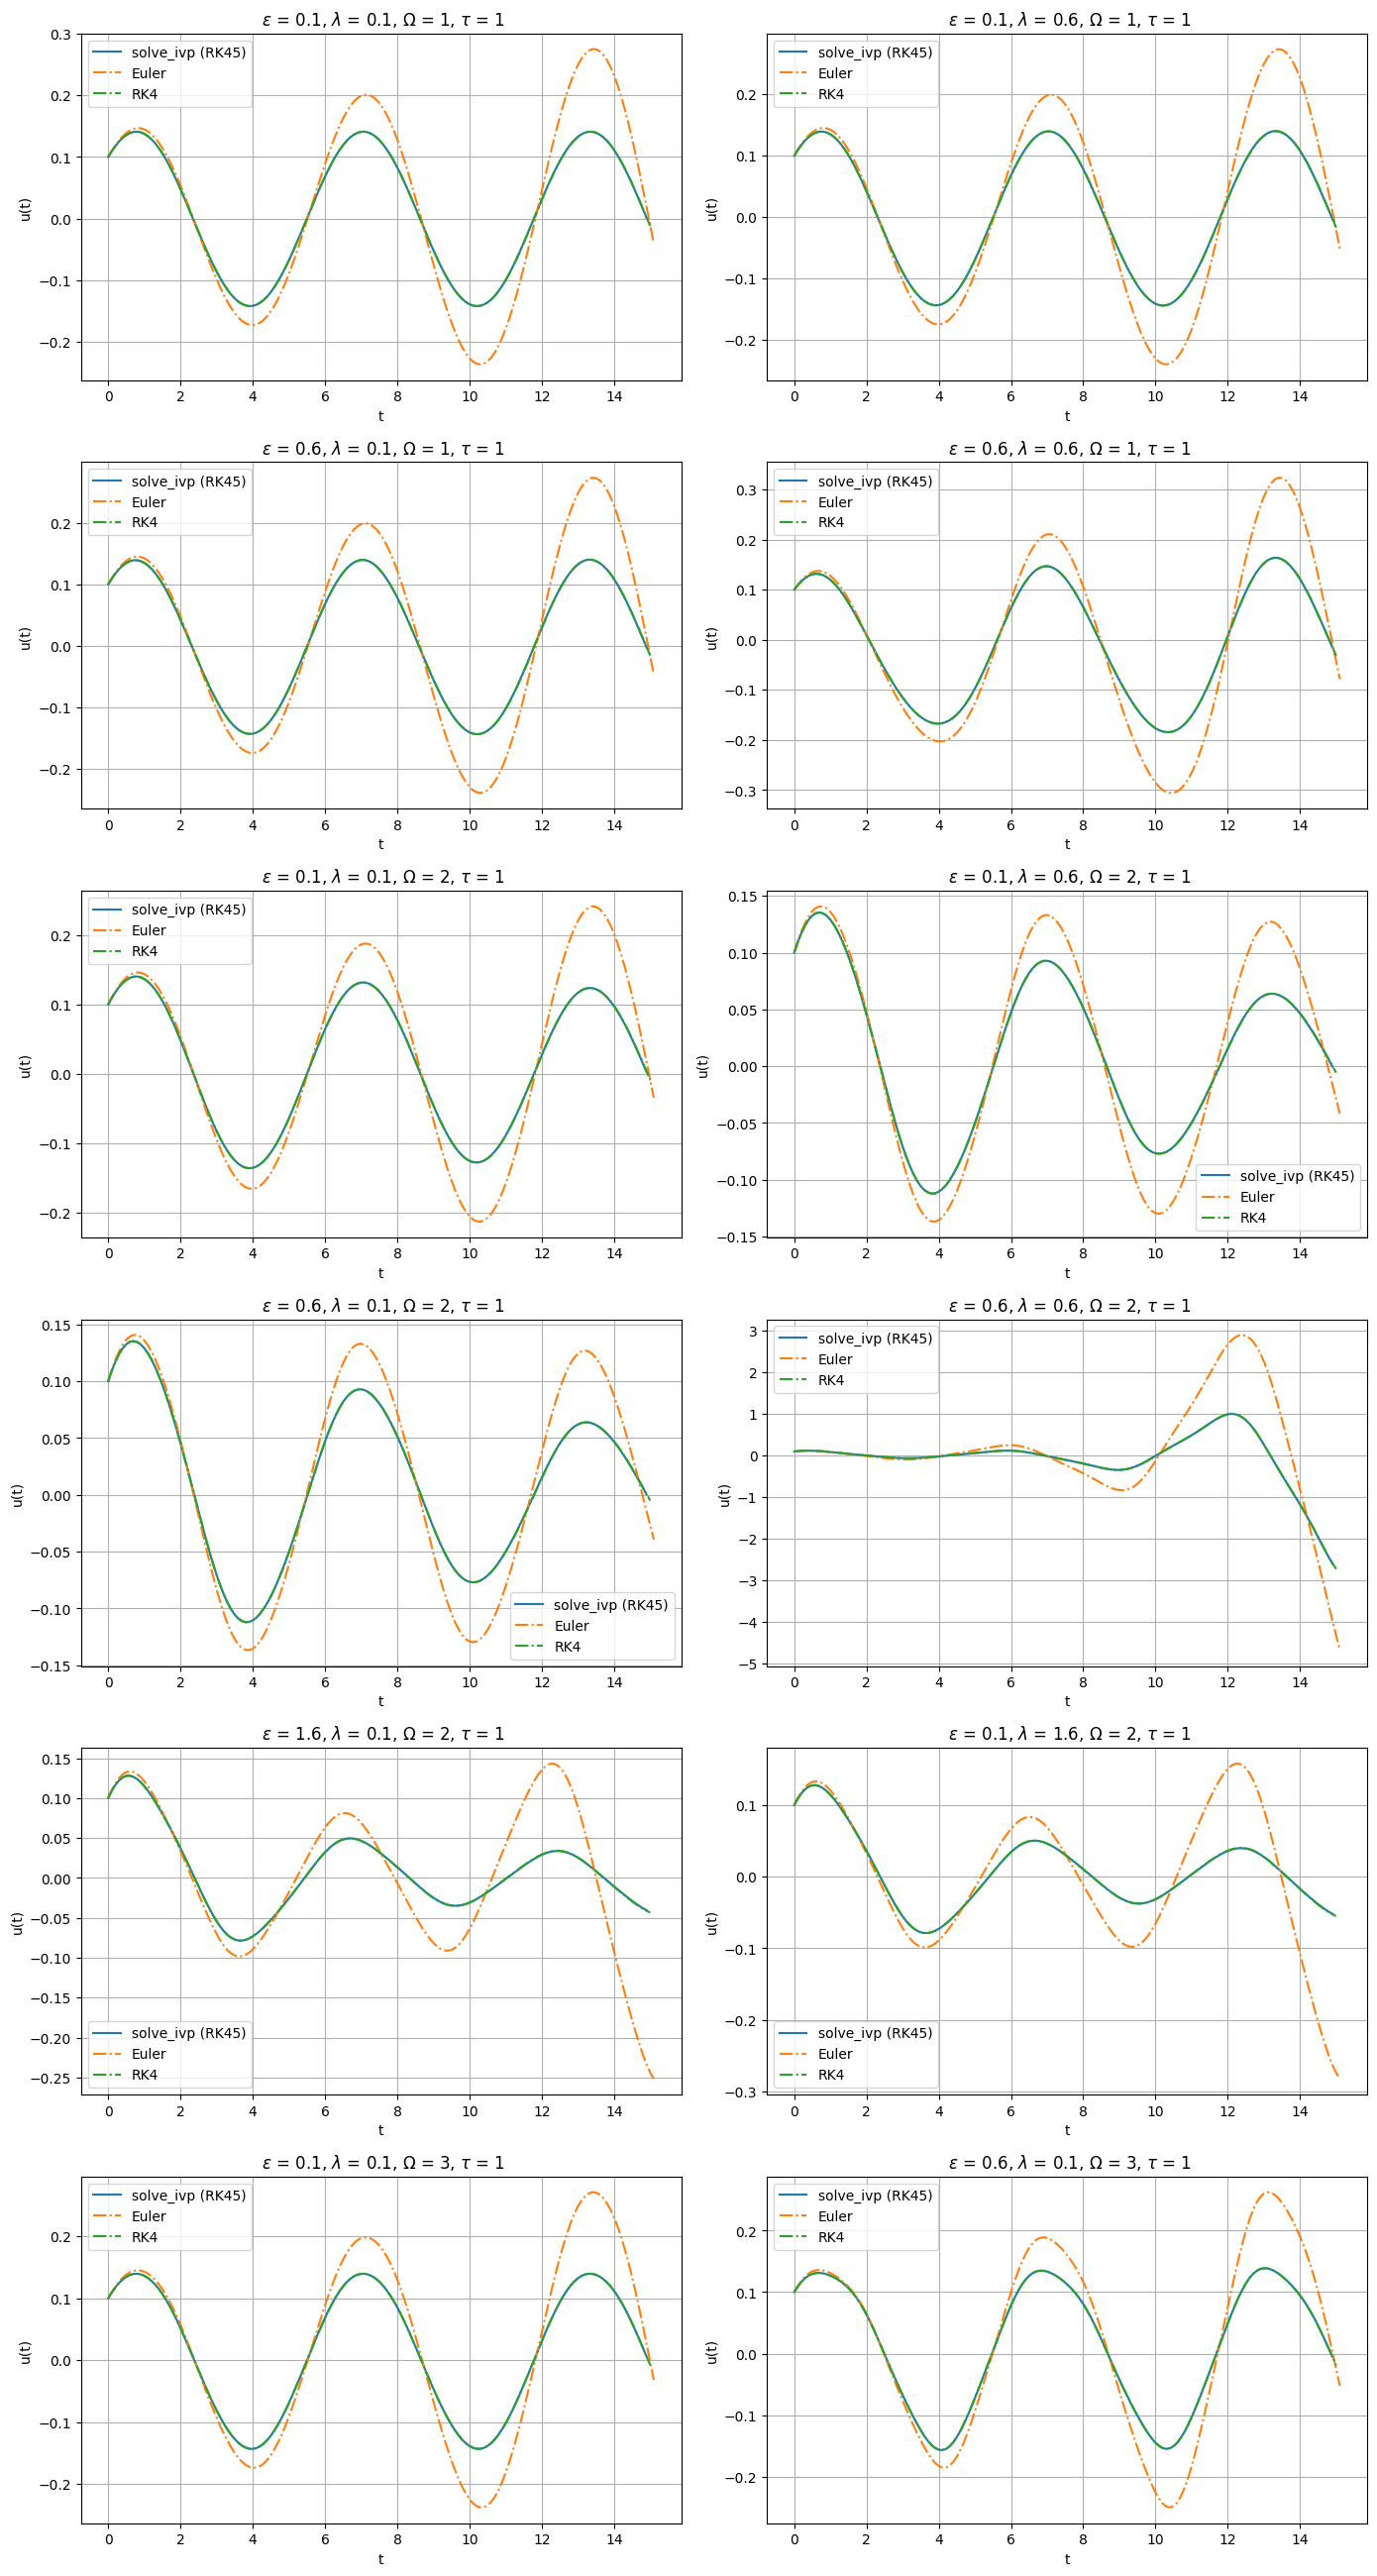

In [ ]:

#Diccionario con parámetros varios
tau = 1
param_dict = {
    1: (0.1, 0.1, 1, tau),
    2: (0.1, 0.6, 1, tau),
    3: (0.6, 0.1, 1, tau),
    4: (0.6, 0.6, 1, tau),
    5: (0.1, 0.1, 2, tau),
    6: (0.1, 0.6, 2, tau),
    7: (0.6, 0.1, 2, tau),
    8: (0.6, 0.6, 2, tau),
    9: (1.6, 0.1, 2, tau),
    10: (0.1, 1.6, 2, tau),
    11: (0.1, 0.1, 3, tau),
    12: (0.6, 0.1, 3, tau),
}

#Intervalo, condiciones iniciales y tamaño de paso
t_span = (0, 15)
iv = [0.1, 0.1]
h = 0.1  

plt.figure(figsize=(14, 30))

for idx, (key, params) in enumerate(param_dict.items(), start=1):
    #Solución con scipy 
    sol_ivp = solve_ivp(
        slosh, t_span, iv, t_eval=np.arange(0, 15, h), args=params, method='RK45'
    )

    #Solución con Euler
    t_euler, u_euler, v_euler = eulerex(lambda t, y: slosh(t, y, *params), 0, iv, 15, h)

    #Solución con RK4
    t_rk4, w_rk4 = RK4(lambda t, y: slosh(t, y, *params), 0, 15, 2, h, iv)

    plt.subplot(7, 2, idx)
    plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp (RK45)', linestyle='-')
    plt.plot(t_euler, u_euler, label='Euler', linestyle='-.')
    plt.plot(t_rk4, w_rk4[0], label='RK4', linestyle='-.')
    plt.title(rf' $\epsilon$ = {param_dict[key][0]}, $\lambda$ = {param_dict[key][1]}, $\Omega$ = {param_dict[key][2]}, $ \tau$ = {param_dict[key][3]}')
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Podemos concluir que en general la función solve_ivp(RK45) y Runghe Kutua 4 se comportan de maneras casi identicas bajp cualquier modificación de los parametos para nuestra ecuacion diferenciancial, mientras que como los gráficos nos lo demuestran al aplicar el método de euler con un paso relativamente "grande" este parece diferir de manera amplia con los resultados dados por solve_ipv(RK45), es decir que en general con un tamaño de paso arbitrario el método de euler puede ser "malo" a la hora de arrojarnos resultados al problema planteado por nuestro PVI

Con el métodod de Euler nuestra solución parece más salvaje las partes donde solve_ivp(RK45) llega a mínimos y máximos parececn enfatixarse crecer o decrecer de manera más extrema, e inestable 

#### Intervalo de solución: $[0,15]$. Tamaño de paso $h = 0.01$. Condiciones iniciales = $[u(0) = 0.1, u'(0) = 0.1]$

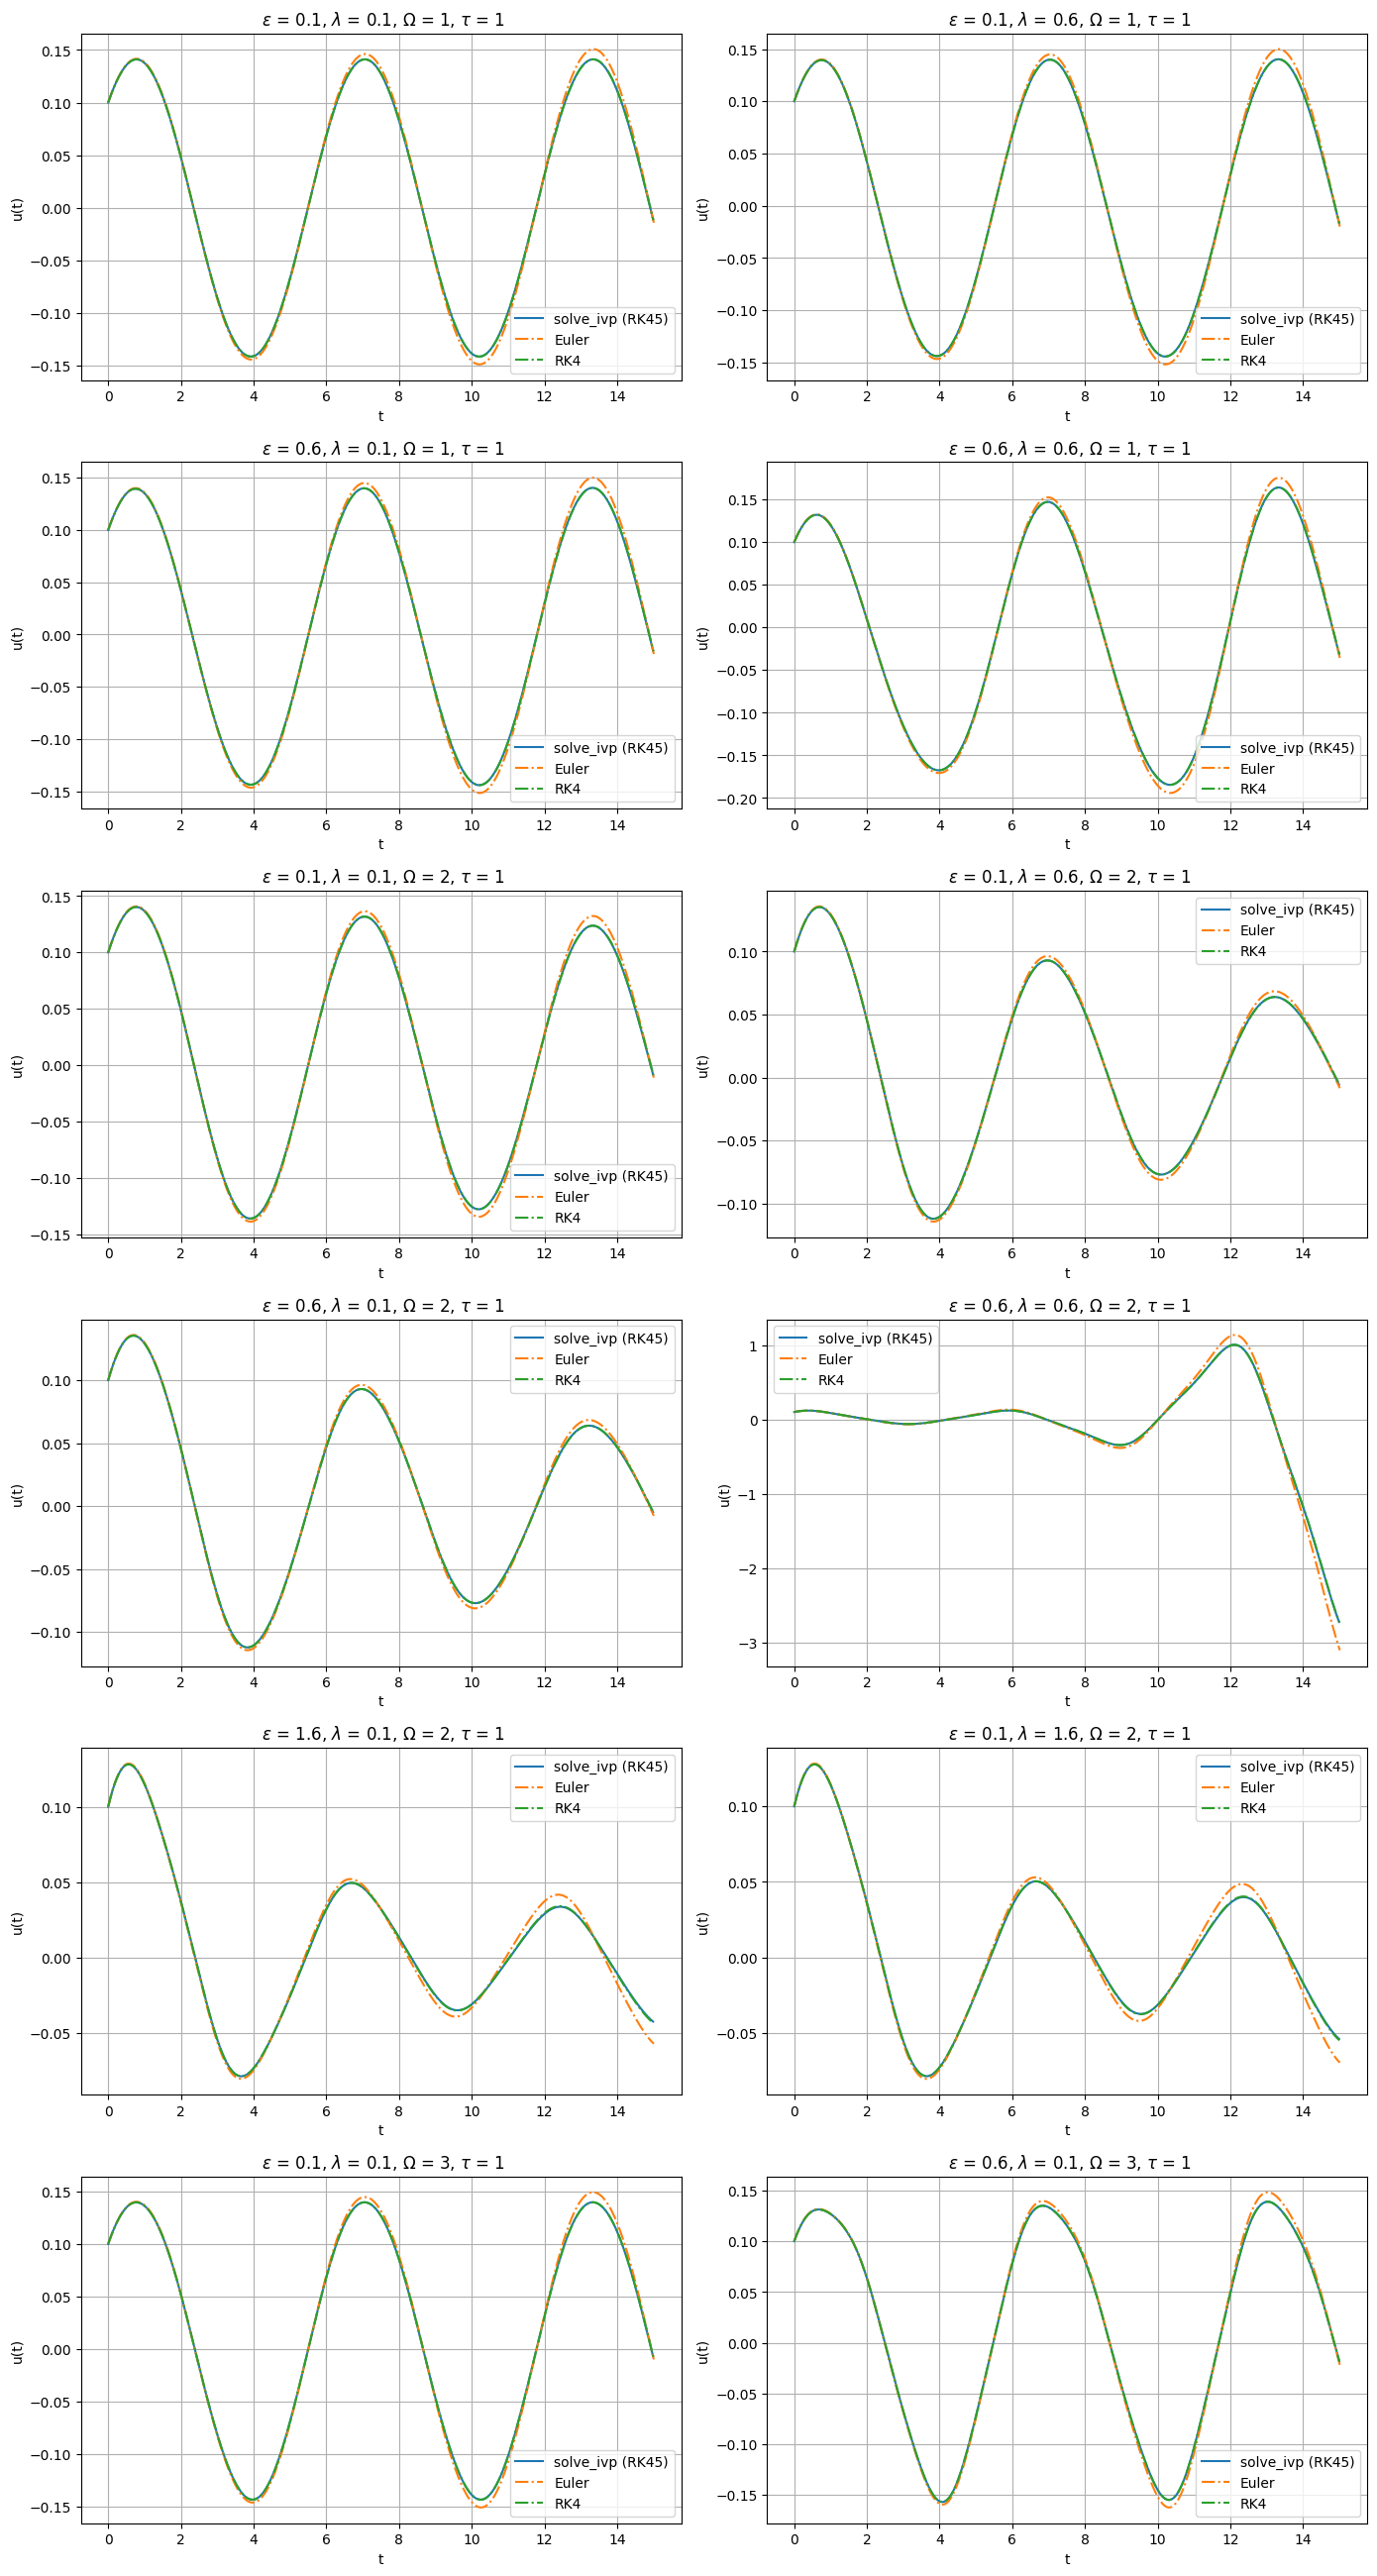

In [ ]:
#Diccionario con parámetros varios
tau = 1
param_dict = {
    1: (0.1, 0.1, 1, tau),
    2: (0.1, 0.6, 1, tau),
    3: (0.6, 0.1, 1, tau),
    4: (0.6, 0.6, 1, tau),
    5: (0.1, 0.1, 2, tau),
    6: (0.1, 0.6, 2, tau),
    7: (0.6, 0.1, 2, tau),
    8: (0.6, 0.6, 2, tau),
    9: (1.6, 0.1, 2, tau),
    10: (0.1, 1.6, 2, tau),
    11: (0.1, 0.1, 3, tau),
    12: (0.6, 0.1, 3, tau),
}

#Intervalo, condiciones iniciales y tamaño de paso
t_span = (0, 15)
iv = [0.1, 0.1]
h = 0.01  

plt.figure(figsize=(14, 30))

for idx, (key, params) in enumerate(param_dict.items(), start=1):
    #Solución con scipy 
    sol_ivp = solve_ivp(
        slosh, t_span, iv, t_eval=np.arange(0, 15, h), args=params, method='RK45'
    )

    #Solución con Euler
    t_euler, u_euler, v_euler = eulerex(lambda t, y: slosh(t, y, *params), 0, iv, 15, h)

    #Solución con RK4
    t_rk4, w_rk4 = RK4(lambda t, y: slosh(t, y, *params), 0, 15, 2, h, iv)

    plt.subplot(7, 2, idx)
    plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp (RK45)', linestyle='-')
    plt.plot(t_euler, u_euler, label='Euler', linestyle='-.')
    plt.plot(t_rk4, w_rk4[0], label='RK4', linestyle='-.')
    plt.title(rf' $\epsilon$ = {param_dict[key][0]}, $\lambda$ = {param_dict[key][1]}, $\Omega$ = {param_dict[key][2]}, $ \tau$ = {param_dict[key][3]}')
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Acá podemos observar como al "dismunuir" el tamaño del paso el reultado arrojado tanto por el método de euler, Runghe kuta 4 y solve_ivp(RK45) se comportan de manera similar, sin emabargo el m?étodo de Euler parece seguir presentando diferencias con respecto los otros dos dando paso a un error mayor 

#### Intervalo de solución: $[0,6]$. Tamaño de paso $h = 0.001$. Condiciones iniciales = $[u(0) = 0.6, u'(0) = 0.6]$

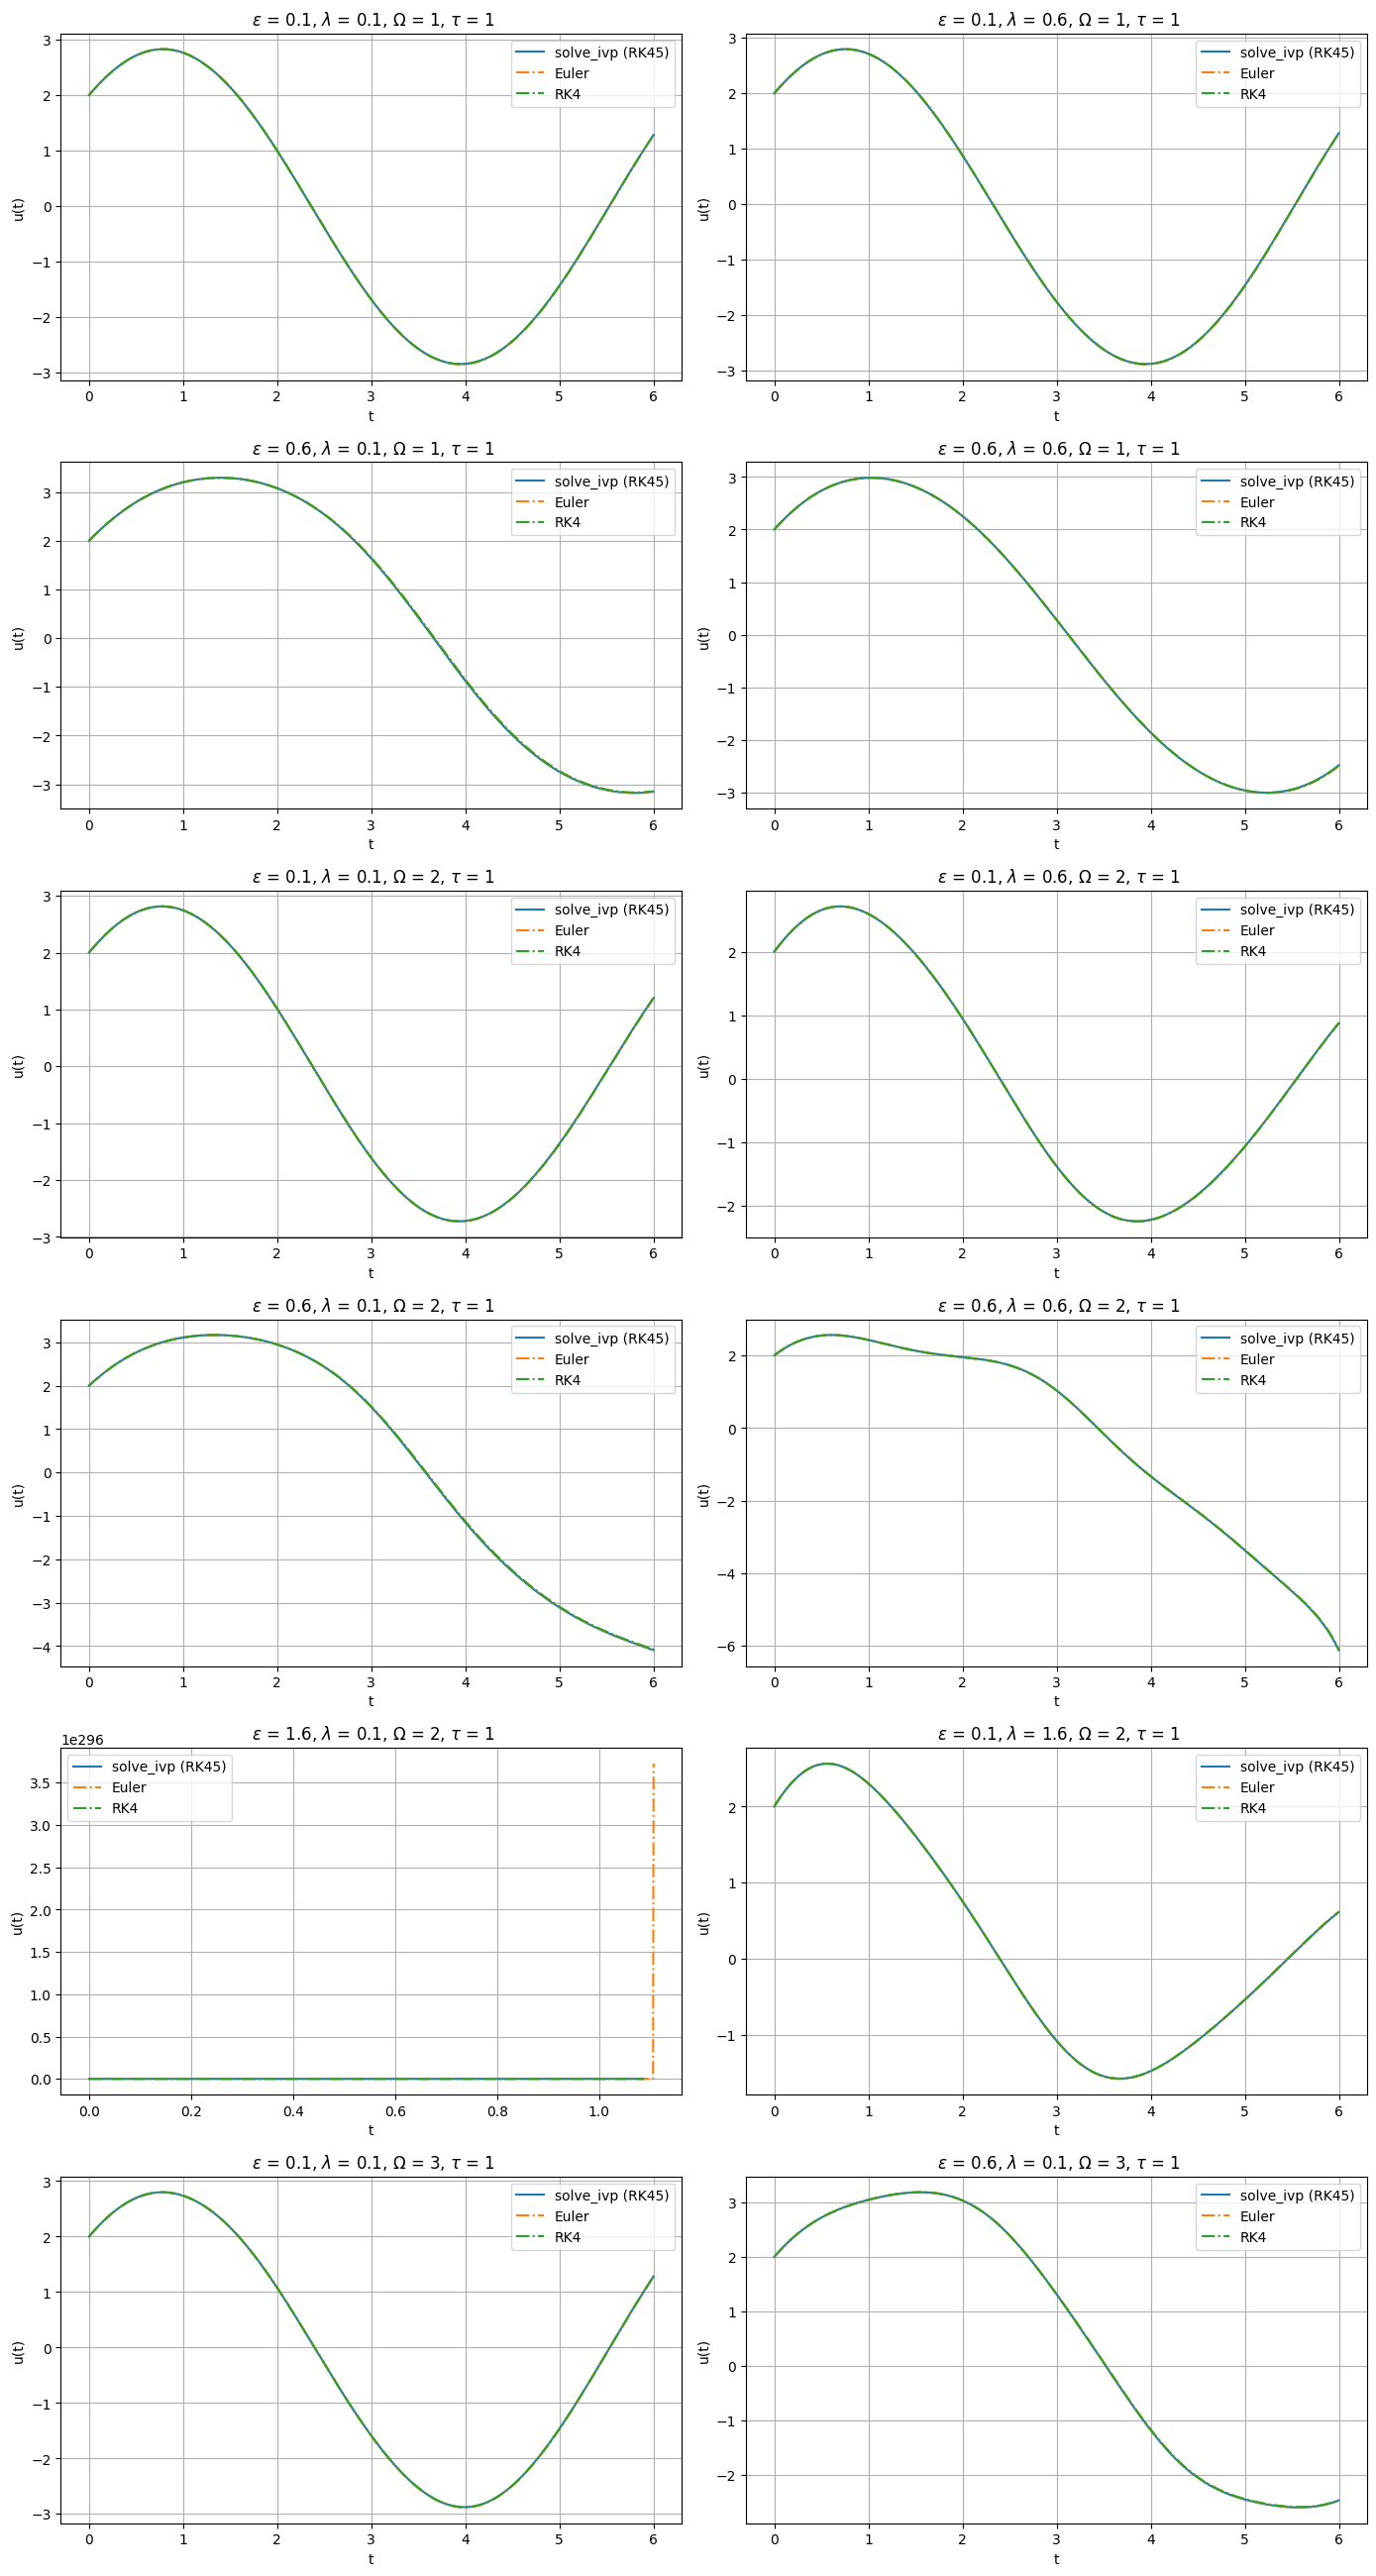

In [ ]:
#Diccionario con parámetros varios
tau = 1
param_dict = {
    1: (0.1, 0.1, 1, tau),
    2: (0.1, 0.6, 1, tau),
    3: (0.6, 0.1, 1, tau),
    4: (0.6, 0.6, 1, tau),
    5: (0.1, 0.1, 2, tau),
    6: (0.1, 0.6, 2, tau),
    7: (0.6, 0.1, 2, tau),
    8: (0.6, 0.6, 2, tau),
    9: (1.6, 0.1, 2, tau),
    10: (0.1, 1.6, 2, tau),
    11: (0.1, 0.1, 3, tau),
    12: (0.6, 0.1, 3, tau),
}

#Intervalo, condiciones iniciales y tamaño de paso
t_span = (0, 6)
iv = [0.6, 0.6]
h = 0.001  

plt.figure(figsize=(14, 30))

for idx, (key, params) in enumerate(param_dict.items(), start=1):
    #Solución con scipy 
    sol_ivp = solve_ivp(
        slosh, t_span, iv, t_eval=np.arange(0, 6, h), args=params, method='RK45'
    )

    #Solución con Euler
    t_euler, u_euler, v_euler = eulerex(lambda t, y: slosh(t, y, *params), 0, iv, 6, h)

    #Solución con RK4
    t_rk4, w_rk4 = RK4(lambda t, y: slosh(t, y, *params), 0, 6, 2, h, iv)

    plt.subplot(7, 2, idx)
    plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp (RK45)', linestyle='-')
    plt.plot(t_euler, u_euler, label='Euler', linestyle='-.')
    plt.plot(t_rk4, w_rk4[0], label='RK4', linestyle='-.')
    plt.title(rf' $\epsilon$ = {param_dict[key][0]}, $\lambda$ = {param_dict[key][1]}, $\Omega$ = {param_dict[key][2]}, $ \tau$ = {param_dict[key][3]}')
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Luego podmos observar que para un tamaño de paso lo "suficientemente" los dos métodos son casi identicos al resultado que nos arroja solve_ivp(RK45) 

Ahora jugando con cada uno de los parametros podemos observar que  para un $$\lambda$$ grande nuestra función solucion parece comprimirse respecto su dominio  mientras que para $$\epsilon$$ más grande las función solucion parece ensancharse respecto al eje x y con un $$\Omega$$ grande parecira perder forma, en general al ser estos parametros muy grande la funcion se descontrola, dandonos como resultado una función menos suave y carente de sentido, podriamos decir que los parametros nos dan una mejor solunión mientras estos suelan ser mas pequeños.



